# Завдання

На основі файлу banking.csv, що міститься в репозиторії лекції, виконайте наступні дії:

1. Сформуйте тестовий та тренувальний датасети (розмір тестової вибірки 0.3).
2. Застосуйте логістичну регресію для прогнозування цільової метрики у (ймовірність того, що клієнт відкриє вклад у банку).
3. Оцініть модель за допомогою матриці похибок, метрик precision, recall, F1-score. Побудуйте AUC-ROC криву для моделі.

# Розв'язок

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#### 1. Формування тестового та тренувального датасетів.

In [2]:
data = pd.read_csv('banking.csv')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [3]:
y = data['y']
data.drop(['y'], axis=1, inplace=True)
numeric_cols = [cname for cname in data.columns if data[cname].dtype in ['int64', 'float64']]
X = data[numeric_cols].copy()
X.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2


In [4]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=0)

#### 2. Застосування логістичної регресії для прогнозування цільової метрики 

In [5]:
log_regression = LogisticRegression(max_iter=1000)
log_regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [6]:
y_pred = log_regression.predict(X_test)

In [7]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10723,   258],
       [  828,   548]], dtype=int64)

#### 3. Оцінка моделі за допомогою матриці похибок, метрик precision, recall, F1-score, побудова AUC-ROC кривої для моделі.

<Axes: >

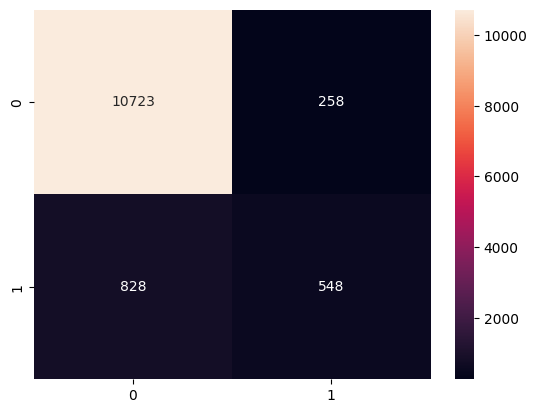

In [8]:
ax = plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax)

In [9]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9121145909201263


In [10]:
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Precision: 0.6799007444168734
Recall: 0.39825581395348836


In [11]:
print("F1-score:", metrics.f1_score(y_test, y_pred, average = None))

F1-score: [0.95180188 0.50229148]


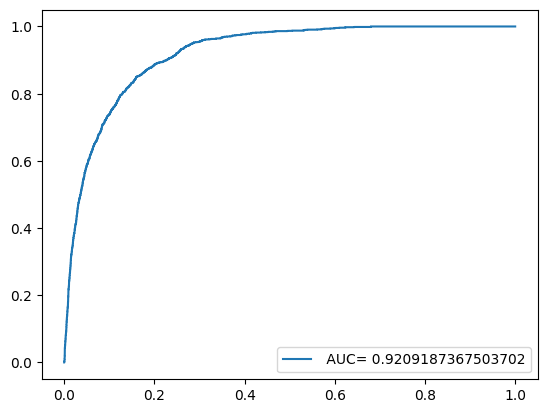

In [13]:
y_pred_proba = log_regression.predict_proba (X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)
plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.legend(loc=4)
plt.show()

Таким чином, крива AUC-ROC свідчить про достатньо високу точність побудованої моделі, адже виокремлює значну область правильно класифікованих зразків даних. Точність моделі також підтверджують інші метрики, хоча значення показників precision і recall свідчить про наявність ознак певної незбалансованості моделі. Тому побудована модель може бути використана для класифікації даних з високою точністю, але може пропускати багато позитивних зразків даних і містити помилки при класифікації негативних зразків.